In [1]:
from graphviz import Graph
from enum import Enum

In [2]:
class Color(Enum):
    Red = 0
    Black = 1

In [3]:
def build_graph():
    g = Graph(format='png')
    node_id = 0

    def build_edge_with_id(x):
        nonlocal node_id
        if x.left is not None and x.left != RBTree.nil:
            if x.left.color == Color.Black:
                g.node(str(id(x.left)), label=str(x.left.key), style='filled', fillcolor='black', fontcolor='white')
            else:
                g.node(str(id(x.left)), label=str(x.left.key), style='filled', fillcolor='red', fontcolor='white')
            g.edge(str(id(x)), str(id(x.left)), color='black')
        else:
            node_id += 1
            g.node(str(node_id), label='nil', style='filled', fillcolor='black', fontcolor='white')
            g.edge(str(id(x)), str(node_id), color='black')
        if x.right is not None and x.right != RBTree.nil:
            if x.right.color == Color.Black:
                g.node(str(id(x.right)), label=str(x.right.key), style='filled', fillcolor='black', fontcolor='white')
            else:
                g.node(str(id(x.right)), label=str(x.right.key), style='filled', fillcolor='red', fontcolor='white')
            g.edge(str(id(x)), str(id(x.right)), color='black')
        else:
            node_id += 1
            g.node(str(node_id), label='nil', style='filled', fillcolor='black', fontcolor='white')
            g.edge(str(id(x)), str(node_id), color='black')
    return g, build_edge_with_id


def render_tree(t):
    graph, b = build_graph()
    graph.node(str(id(t.root)), label=str(t.root.key), style='filled', fillcolor='black', fontcolor='white')
    t.traverse(b)
    return graph

In [4]:
class RBNode:
    def __init__(self, key=0, color=Color.Red):
        self.p = None
        self.children = {}     # 0: left child 1 right child
        self.color = color
        self.key = key

    @property
    def left(self):
        return self.children.get(0, None)

    @left.setter
    def left(self, value):
        self.children[0] = value

    @property
    def right(self):
        return self.children.get(1, None)

    @right.setter
    def right(self, value):
        self.children[1] = value

In [31]:
class RBTree:
    nil = RBNode(key=-1, color=Color.Black)
    nil.p = nil
    nil.left = nil
    nil.right = nil

    def __init__(self):
        self.root = RBTree.nil
        self.root.p = RBTree.nil
        self.root.left = RBTree.nil
        self.root.right = RBTree.nil

    @classmethod
    def __traverse(cls, x: RBNode, func):
        if x != RBTree.nil:
            cls.__traverse(x.left, func)
            func(x)
            cls.__traverse(x.right, func)

    @classmethod
    def __mini_node(cls, x: RBNode):
        y = RBTree.nil
        while x != RBTree.nil:
            y = x
            x = x.left
        return y

    def __left_rotate(self, x: RBNode):
        y = x.right
        x.right = y.left
        if y.left != RBTree.nil:
            y.left.p = x
        y.p = x.p
        if x.p == RBTree.nil:
            self.root = y
        elif x == x.p.left:
            x.p.left = y
        else:
            x.p.right = y
        y.left = x
        x.p = y

    def __right_rotate(self, y: RBNode):
        x = y.left
        y.left = x.right
        if x.right != RBTree.nil:
            x.right.p = y
        x.p = y.p
        if y.p == RBTree.nil:
            self.root = x
        elif y == y.p.right:
            y.p.right = x
        else:
            y.p.left = x
        x.right = y
        y.p = x

    def __insert(self, z: RBNode):
        y = RBTree.nil
        x = self.root
        while x != RBTree.nil:
            y = x
            if z.key < x.key:
                x = x.left
            else:
                x = x.right
        z.p = y
        if y == RBTree.nil:
            self.root = z
        elif z.key < y.key:
            y.left = z
        else:
            y.right = z
        z.left = RBTree.nil
        z.right = RBTree.nil
        self.__insert_fixup(z)

    def __insert_fixup(self, z: RBNode):
        while z.p.color == Color.Red:
            if z.p == z.p.p.left:
                y = z.p.p.right
                if y.color == Color.Red:
                    z.p.color = Color.Black
                    y.color = Color.Black
                    z.p.p.color = Color.Red
                    z = z.p.p
                else:
                    if z == z.p.right:
                        z = z.p
                        self.__left_rotate(z)
                    z.p.color = Color.Black
                    z.p.p.color = Color.Red
                    self.__right_rotate(z.p.p)
            else:
                y = z.p.p.left
                if y.color == Color.Red:
                    z.p.color = Color.Black
                    y.color = Color.Black
                    z.p.p.color = Color.Red
                    z = z.p.p
                else:
                    if z == z.p.left:
                        z = z.p
                        self.__right_rotate(z)
                    z.p.color = Color.Black
                    z.p.p.color = Color.Red
                    self.__left_rotate(z.p.p)
        self.root.color = Color.Black

    def __transplant(self, u, v):
        if u.p == RBTree.nil:
            self.root = v
        elif u == u.p.left:
            u.p.left = v
        else:
            u.p.right = v
        v.p = u.p

    def __delete_fixup(self, x: RBNode):
        while x != self.root and x.color == Color.Black:
            if x == x.p.left:
                w = x.p.right
                if w.color == Color.Red:
                    print(f'情况1 w = {w.key}')
                    g = render_tree(self)
                    display(g)
                    w.color = Color.Black
                    x.p.color = Color.Red
                    self.__left_rotate(x.p)
                    w = x.p.right
                if w.left.color == Color.Black and w.right.color == Color.Black:
                    print(f'情况2 w = {w.key}')
                    g = render_tree(self)
                    display(g)
                    w.color = Color.Red
                    x = x.p
                elif w.right.color == Color.Black:
                    print(f'情况3 w = {w.key}')
                    g = render_tree(self)
                    display(g)
                    w.left.color = Color.Black
                    w.color = Color.Red
                    self.__right_rotate(w)
                    w = x.p.right
                    print(f'情况4 w = {w.key}')
                    g = render_tree(self)
                    display(g)
                    w.color = x.p.color
                    x.p.color = Color.Black
                    w.right.color = Color.Black
                    self.__left_rotate(x.p)
                    x = self.root
            else:
                w = x.p.left
                if w.color == Color.Red:
                    print(f'情况1 w = {w.key}')
                    g = render_tree(self)
                    display(g)
                    w.color = Color.Black
                    x.p.color = Color.Red
                    self.__right_rotate(x.p)
                    w = x.p.left
                if w.left.color == Color.Black and w.right.color == Color.Black:
                    print(f'情况2 w = {w.key}')
                    g = render_tree(self)
                    display(g)
                    w.color = Color.Red
                    x = x.p
                elif w.left.color == Color.Black:
                    print(f'情况3 w = {w.key}')
                    g = render_tree(self)
                    display(g)
                    w.right.color = Color.Black
                    w.color = Color.Red
                    self.__left_rotate(w)
                    w = x.p.left
                    print(f'情况4 w = {w.key}')
                    g = render_tree(self)
                    display(g)
                    w.color = x.p.color
                    x.p.color = Color.Black
                    w.left.color = Color.Black
                    self.__right_rotate(x.p)
                    x = self.root
        print(f'给x着色为黑色')
        g = render_tree(self)
        display(g)
        x.color = Color.Black
        print(f'结束')
        g = render_tree(self)
        display(g)

    def insert(self, key: int):
        n = RBNode(key, Color.Red)
        self.__insert(n)

    def delete(self, key):
        z = self.find(key)
        if z is None:
            return None
        y = z
        y_original_color = y.color
        if z.left == RBTree.nil:
            x = z.right
            self.__transplant(z, z.right)
        elif z.right == RBTree.nil:
            x = z.left
            self.__transplant(z, z.left)
        else:
            y = RBTree.__mini_node(z.right)
            y_original_color = y.color
            x = y.right
            if y == z.right:
                x.p = y
            else:
                self.__transplant(y, y.right)
                y.right = z.right
                y.right.p = y
            self.__transplant(z, y)
            y.left = z.left
            y.left.p = y
            y.color = z.color
        if y_original_color == Color.Black:
            self.__delete_fixup(x)

    def find(self, key):
        x = self.root
        while x != RBTree.nil:
            if x.key == key:
                return x
            elif x.key > key:
                x = x.left
            else:
                x = x.right
        return None

    def traverse(self, *args):
        def print_func(x: RBNode):
            print(f'{x.key} ')
        if len(args) == 0:
            RBTree.__traverse(self.root, print_func)
        else:
            RBTree.__traverse(self.root, args[0])

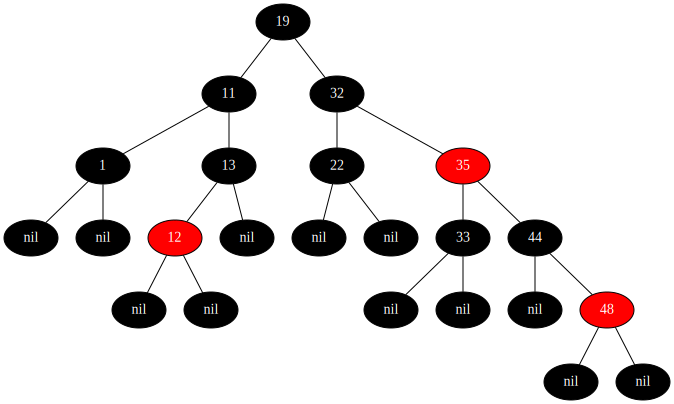

In [32]:
T = RBTree()
l = [11, 1, 19, 44, 13, 12, 22, 32, 33, 35, 48]
for e in l:
    T.insert(e)
render_tree(T)

情况1 w = 35


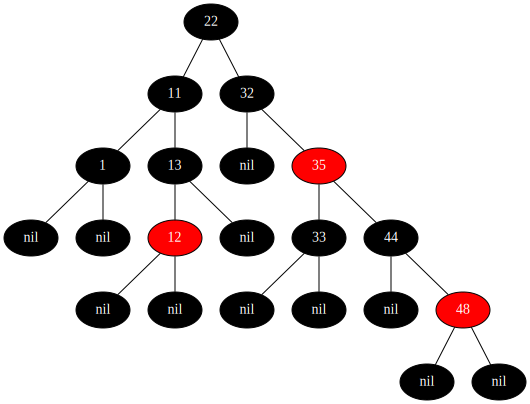

情况2 w = 33


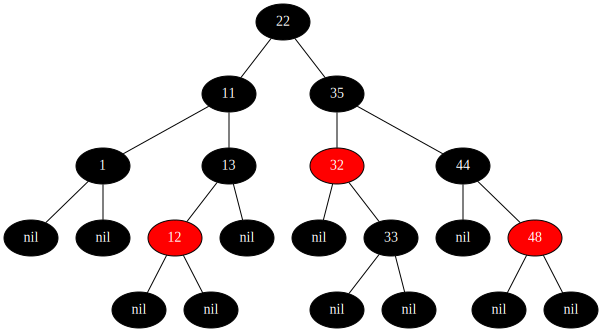

给x着色为黑色


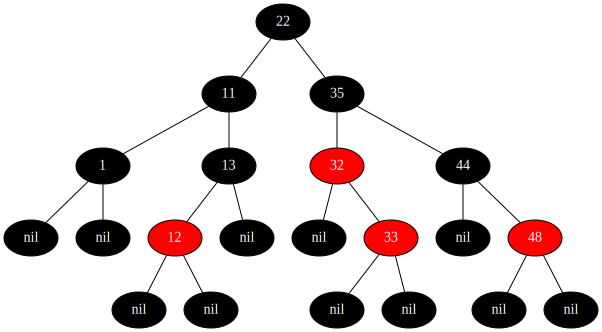

结束


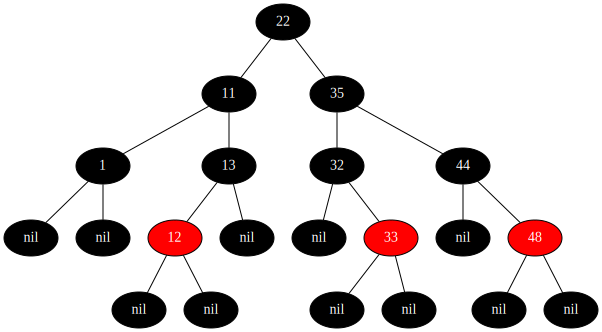

In [33]:
T.delete(19)

情况3 w = 13


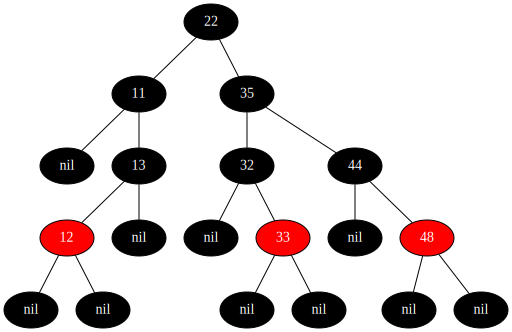

情况4 w = 12


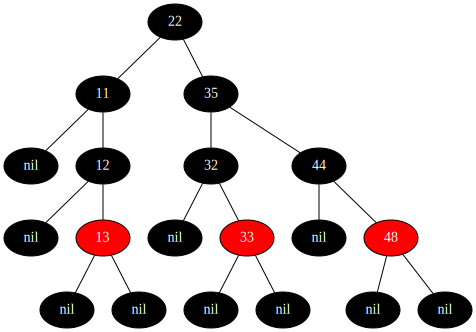

给x着色为黑色


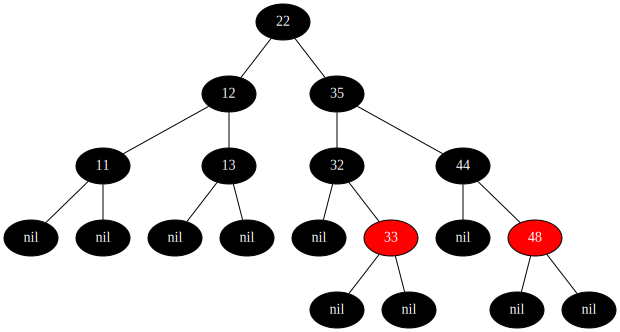

结束


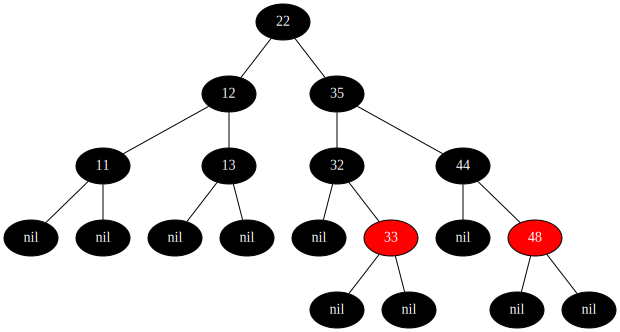

In [34]:
T.delete(1)